# 1. Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 2. Extract Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/04. Regression/taxi_fare.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


# 3. Mini EDA

In [3]:
import seaborn as sns

<Axes: >

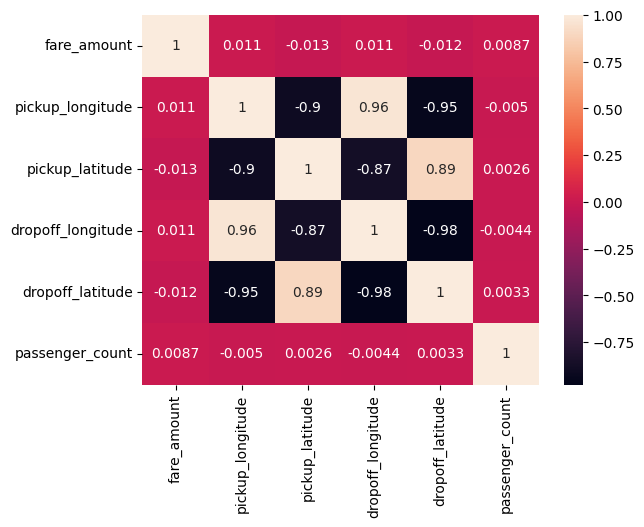

In [4]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# 4. Simple Linear Regression
$y = ax+b$

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['pickup_latitude']]
y = df['fare_amount']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def regression_model_performance(model,X,y_true,label="Training"):
    print("Model Performance in Data",label)

    y_predicted = model.predict(X)

    r2_score  = model.score(X,y_true)
    mae  = mean_absolute_error(y_true,y_predicted)
    mse  = mean_squared_error(y_true,y_predicted,squared=True)
    rmse = mean_squared_error(y_true,y_predicted,squared=False)


    print("R^2  :",r2_score)
    print("MAE  :",mae)
    print("MSE  :",mse)
    print("RMSE :",rmse)

In [36]:
regression_model_performance(model,X_train,y_train,label="Training")

Model Performance in Data Training
R^2  : 0.00018379931066658806
MAE  : 5.999070023303353
MSE  : 92.79350063198348
RMSE : 9.63293831766733


In [21]:
regression_model_performance(model,X_test,y_test,label="Testing")

Model Performance in Data Testing
R^2  : -0.00019105522832840727
MAE  : 5.884006069957965
MSE  : 84.88869559927244
RMSE : 9.213506151258187


## Evaluation

In [28]:
fare_predicted = model.predict(X)

df_evaluasi = pd.DataFrame({'pickup_latitude': df['pickup_latitude'],
                            'fare amount':y,
                            'predicted':fare_predicted})
df_evaluasi['error'] = abs(df_evaluasi['fare amount'] - df_evaluasi['predicted'])
df_evaluasi['error^2'] = df_evaluasi['error']**2
df_evaluasi

,pickup_latitude,fare amount,predicted,error,error^2
0,40.721319,4.5,11.306245,6.806245,46.324974
1,40.711303,16.9,11.306437,5.593563,31.287950
2,40.761270,5.7,11.305481,5.605481,31.421422
3,40.733143,7.7,11.306019,3.606019,13.003374
4,40.768008,5.3,11.305353,6.005353,36.064260
...,...,...,...,...,...
18914,40.720635,22.5,11.306258,11.193742,125.299853
18915,40.751825,5.5,11.305662,5.805662,33.705711
18916,40.762691,6.5,11.305454,4.805454,23.092391
18917,40.739338,5.3,11.305901,6.005901,36.070844


Amannya error (MAE,RMSE) biasanya sekitar 1% dari rata-rata value, maksimum 10%.

In [31]:
0.01*df_evaluasi['fare amount'].mean()

0.1128886251916063

# 5. Multiple Linear Regression
- Multiple Linear Regression : lebih dari 1 variabel independent
  > Contoh : $y=ax_1+bx_2+c$

## 5.1. Data Splitting

In [38]:
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
y = df['fare_amount']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 5.2. Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression


num_preprocessor = Pipeline([("num_imputer",SimpleImputer(strategy='median')),
                             ("num_scaler",MinMaxScaler())])

cat_preprocessor = Pipeline([("cat_imputer",SimpleImputer(strategy='most_frequent')),
                             ("cat_encoder",OneHotEncoder())])


num_columns = ['pickup_longitude','pickup_latitude',
               'dropoff_longitude', 'dropoff_latitude',
               'passenger_count']
cat_columns = []


preprocess = ColumnTransformer([("num_pipe",num_preprocessor,num_columns),
                                ("cat_pipe",cat_preprocessor,cat_columns)])


complete_pipeline = Pipeline([("preprocess",preprocess),
                              ("model",LinearRegression())])

## 5.3. Modeling

In [43]:
model = complete_pipeline.fit(X_train,y_train)

## 5.4. Evaluasi

In [44]:
regression_model_performance(model,X_train,y_train)

Model Performance in Data Training
R^2  : 0.0002875643449474774
MAE  : 5.999011292274117
MSE  : 92.78387014113177
RMSE : 9.632438431733252


## 5.5. How to Improve Regression Models by Analyzing Residual

In [48]:
import matplotlib.pyplot as plt

def plot_residual(model,X,y_true,label):
    y_predicted = model.predict(X)

    residual = y_true - y_predicted
    x = np.arange(0,len(residual))

    plt.scatter(x,residual)
    plt.axhline(c='r', label = 'Error = 0')
    plt.legend()
    plt.title(f"Residual Plot in Data {label}")
    plt.ylabel("residual")

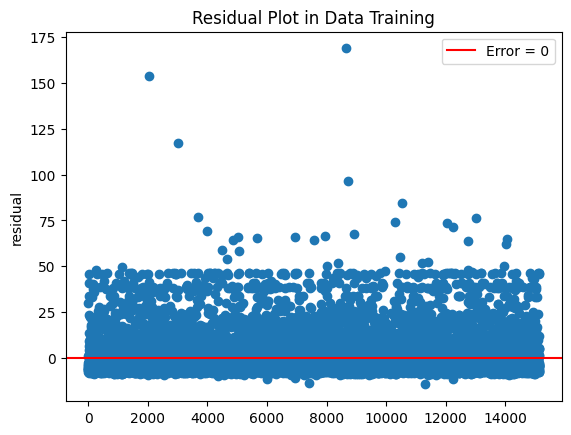

In [49]:
plot_residual(model,X_train,y_train,"Training")

Cara improve :
1. Jika residual plot tidak balance, dapat melakukan :
    - transform datanya misalnya pakai scaling (MinMax, StandardScaler, RobustScaler, PowerTransformer).
    - menambahkan fitur
2. HETEROSCEDASTICITY     
    - transform datanya misalnya pakai scaling (MinMax, StandardScaler, RobustScaler, PowerTransformer).
    - menambahkan fitur
3. Nonlinear, model yang dipakai terlalu sederhana, tidak dapat mengikuti pola data yang nonlinear.
    - naikkan kompleksitas model, seperti menjadi Polynomial
    - menambahkan fitur
4. Outlier
    - outlier dapat dihapus
    - transformasi data (feature scaling)